In [2]:
%load_ext autoreload
%autoreload 2
from pygsti.extras.errorgenpropagation.propagatableerrorgen import *
from pygsti.extras.errorgenpropagation.errorpropagator import *
from pygsti.circuits import Circuit
import numpy as np
import pygsti.processors
import pygsti
import pygsti.tools.lindbladtools as _lt
import scipy
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Introduction to the Propagatable Error Generators Code

## Defining a circuit and error generators

Currently Error Propgagation works for any model that meets three criteria

    1.  The circuit is clifford
    2.  The errors on each gate can be defined at a time t of interest in the small markovian errors basis
    3.  The error error model is defined such that a gate G has some linear combination of error generators following it

We can therefore, start a code by defining a circuit and an error model by simply following the common pyGSTi notation

In [3]:
errorModel={
    'Gxpi2' : {('H','Y'):.01}

}
c=Circuit(10*[('Gxpi2',0)])

Now we can take the above definitions and plug them into the errorpropagator function, to get out a list of post-circuit error generators out.

In [4]:
errors=ErrorPropagator(c,errorModel,BCHOrder=1,BCHLayerwise=False,NonMarkovian=False)

[[[('H', ('Y',), 0.01)]]]
[[[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]]]
[[[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]]]
[[[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]]]
[[[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]]]
[[[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]]]
[[[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]]]
[[[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]]]
[[[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 0.01)]], [[('H', ('Y',), 

Here BCH order determines the to what order the BCH order will be taken to (if applicable). BCHLayerwise will if false, propagatate all errors to the end before taking the BCH expansion, otherwise it will push the errorgens through a layer and combine with the the error generators for that layer by the rules given by the BCHOrder.  Non-markovian prevents any simplification or BCH expansions being taken, instead allowing the output to be a list a lists, where the each sublist denotes the errorgenerators that were occuring at time t in the circuit.

Additionally, if you want to describe a gate with multiple associated error definitions you can define it as follows.

In [8]:
MultiGateDict={'Gxpi22' : 'Gxpi2'}
errorModel={
    'Gxpi2' : {('H','Y'):.01},
    'Gxpi22' : {('H','X'):.01}

}
c=Circuit(10*[('Gxpi2',0),('Gxpi22',0)])

ErrorPropagator(c,errorModel,MultiGateDict=MultiGateDict, MultiGate=True)

[('H', ('X',), (0.09999999999999999+0j))]

Once the errors are propagated to the process matrix given by the end of circuit error generators is given by

In [5]:
expMat=np.zeros([4**len(c.line_labels),4**len(c.line_labels)],dtype=np.complex128)
for error in errors:
    expMat +=error.toWeightedErrorBasisMatrix()
processMatrix = scipy.linalg.expm(expMat)

## Non-Markovianity

If you want to use the non markovianity function you need to define an n x n correlation where n is the number of layers.  Currently, we are capable of describing each layer to be governed by some stochastic process, that is correlated to the other layers.  To using the code is relatively simple, see the below example

Text(0.5, 1.0, 'White noise dephasing')

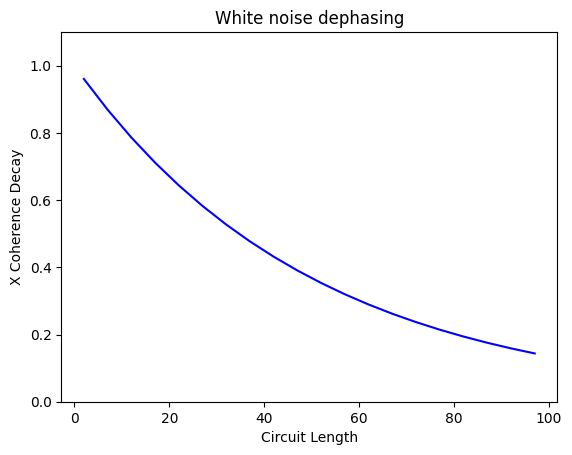

In [6]:
x_coherence = []
Ls = range(2,100,5)
for L in Ls:
    c=Circuit((L)*[('Gi' ,0)])
    ErrorDict={'Gi' : {('H','Z'): 1}}
    EndErrors = ErrorPropagator(c,ErrorDict,NonMarkovian=True)

    corr=np.eye(len(c))*.01
    error = averaged_evolution(corr,EndErrors,1)

    x_coherence += [np.real(error[1,1])]
plt.plot(Ls,x_coherence, color='blue')
plt.ylim(0,1.1)
plt.xlabel('Circuit Length')
plt.ylabel('X Coherence Decay')
plt.title('White noise dephasing')

In [6]:
list=[propagatableerrorgen('H',['X'],1)]
errors=ErrorPropagator(c,list,NonMarkovian=True,ErrorLayerDef=True)
print(errors)

[[[('H', ('X',), (1+0j))]], [[('H', ('X',), (1+0j))]], [[('H', ('X',), (1+0j))]], [[('H', ('X',), (1+0j))]], [[('H', ('X',), (1+0j))]], [[('H', ('X',), (1+0j))]], [[('H', ('X',), (1+0j))]], [[('H', ('X',), (1+0j))]], [[('H', ('X',), (1+0j))]], [[('H', ('X',), (1+0j))]]]
